In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
from keras.utils.np_utils import to_categorical

In [48]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1]]
X,y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

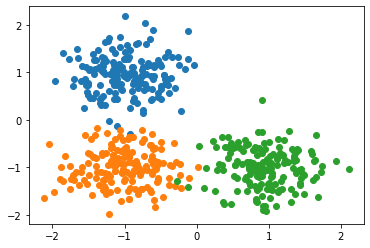

In [49]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])

In [50]:
y_cat = to_categorical(y,3)

In [51]:
model = Sequential()
model.add(Dense(units = 3, input_shape = (2,) , activation = 'softmax'))
adam = Adam(lr = 0.1)
model.compile(adam,loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X, y_cat, verbose = 1, batch_size = 50, epochs = 100, shuffle = 'true' )

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.0986 - accuracy: 0.3599
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.9780
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9851
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.9893
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9904
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9894
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9907
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9949
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9903
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9900
Epoch 11/

In [52]:
def plot_decision_boundary(X,y_cat,model):
    x_span = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1, max(X[:,1])+1)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


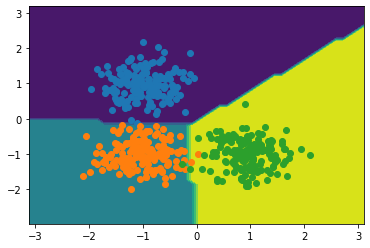

In [53]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])

prediction is: [0]


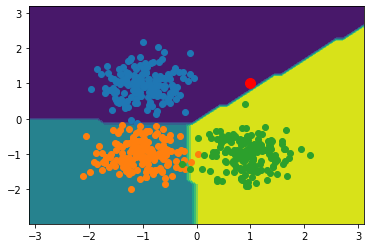

In [54]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
x = 1
y = 1
point = np.array([[x,y]])
prediction = model.predict_classes(point)
print('prediction is:', prediction)
plt.plot([x],[y], marker = 'o', markersize = 10, color = 'r')